# Project - Brazilian E-Commerce Data Analysis

## Overview

__EDA__

Step 1: Familiarize with the dataset

__Potential Business Questions to study__
* Sales
    * Predicts future sales
* Delivery
    * Find ways to optimize delivery times
* Product quality:
    * What products are prone to customer satisfaction?
    * Sentiment analysis
* Customer segmentation


__Data Source:__
* [Kaggle](https://www.kaggle.com/olistbr/brazilian-ecommerce)
* Attention
    * An order might have multiple items.
    * Each item might be fulfilled by a distinct seller.
    * All text identifying stores and partners where replaced by the names of Game of Thrones great houses.


# Step 1: Import libraries and Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns





In [2]:
data_file = [
    'customers',
    'geolocation',
    'order_items',
    'order_payments',
    'orders',
    'order_reviews',
    'products',
    'sellers',
]


data={}
for f in data_file:
    d = pd.read_csv('olist/olist_{}_dataset.csv'.format(f))
    data[f] = d
    
data['product_category'] = pd.read_csv('olist/product_category_name_translation.csv')

# Customer segmentation

In [3]:
customers = data['customers']
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Explore variable in other datasets that can be useful to this analysis e.g.
* Are they frequent shoppers? How many orders do they place per month?
* What type of products do they buy? Do they buy various types? 
* How many items of products do they buy?
* How much do you spend per month
* Do they pay in full or use payment plan?
* Do they leave reviews?
* How many sellers they interacted with? Do they always order from the same sellers?

In [4]:
print(data.keys())
for k in data.keys():
    print(k, data[k].shape)
    
customers=data['customers']
geolocation=data['geolocation']
order_items=data['order_items']
order_payments=data['order_payments']
orders=data['orders']
order_reviews=data['order_reviews']
products=data['products']
sellers=data['sellers']
product_category=data['product_category']  


dict_keys(['customers', 'geolocation', 'order_items', 'order_payments', 'orders', 'order_reviews', 'products', 'sellers', 'product_category'])
customers (99441, 5)
geolocation (1000163, 5)
order_items (112650, 7)
order_payments (103886, 5)
orders (99441, 8)
order_reviews (100000, 7)
products (32951, 9)
sellers (3095, 4)
product_category (71, 2)


In [5]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [6]:
print(len(set(customers.customer_unique_id)))
print(len(set(customers.customer_id)))

96096
99441


> There are 96,096 unique customers and 99,441 orders, which suggests that most customers placed about 1 order.  
The item per order is also about 1 since total order items are 112,650. 



In [7]:
# calculate numer of items per customer_unique_id  

df1 = pd.merge(order_items,orders, on=['order_id'])
df2 = pd.merge(df1,customers, on=['customer_id'])
df2 = pd.merge(df2,order_payments, on=['order_id'])
df2 = pd.merge(df2,order_reviews, on=['order_id'])
products2 = pd.merge(products,product_category, on=['product_category_name'])
df2 = pd.merge(df2,products2, on=['product_id'])

df2.groupby('customer_unique_id').order_item_id.nunique().value_counts()

1     84585
2      7294
3      1276
4       491
6       192
5       192
7        22
8         8
10        7
12        5
11        4
9         3
20        2
14        2
15        2
13        1
21        1
Name: order_item_id, dtype: int64

In [8]:
df2.groupby('customer_unique_id').order_id.nunique().value_counts()

1     91238
2      2617
3       185
4        30
5         9
7         3
6         3
15        1
9         1
Name: order_id, dtype: int64

> Majority of customers bought 1 item & placed 1 order


In [9]:
geolocation.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


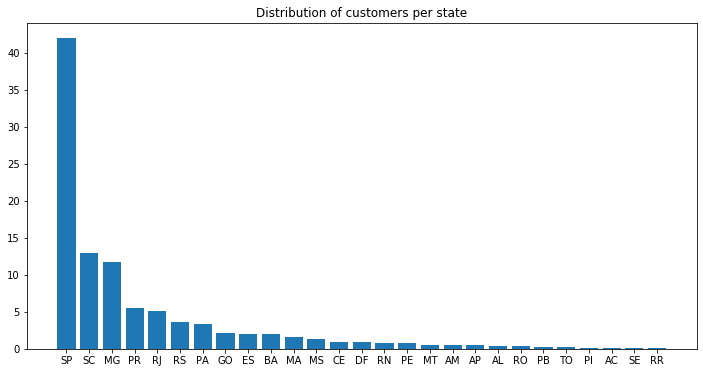

In [10]:
states = customers.customer_state.unique()
cities = customers.customer_city.unique()

distribution = customers.customer_state.value_counts(normalize=True)*100

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.bar(states, distribution)
ax.set_title('Distribution of customers per state')
plt.show()

> Majority of customers live in SP state

In [11]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [12]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [13]:
order_payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [14]:
order_payments.payment_type.value_counts(normalize=True)

credit_card    0.739224
boleto         0.190440
voucher        0.055590
debit_card     0.014718
not_defined    0.000029
Name: payment_type, dtype: float64

In [15]:
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64


/Users/siprapaitang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


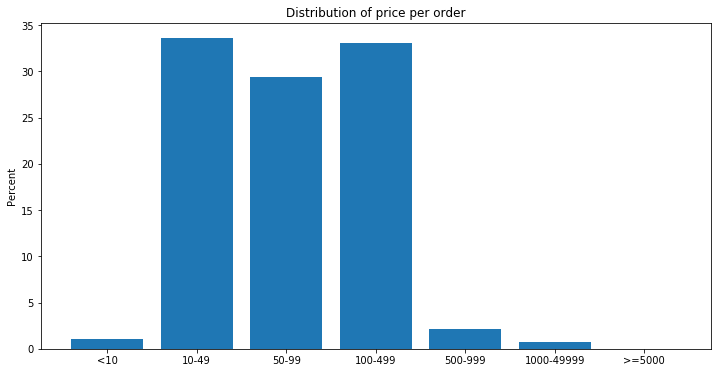

In [16]:
# What's the order value distribution per items?

print(data['order_items']['price'].describe())

price = data['order_items']['price']
data['order_items']['price_group']=0
data['order_items']['price_group'].loc[price<10]=1
data['order_items']['price_group'].loc[(10<=price) & (price<50)]=2
data['order_items']['price_group'].loc[(50<=price) & (price<100)]=3
data['order_items']['price_group'].loc[(100<=price) & (price<500)]=4
data['order_items']['price_group'].loc[(500<=price) & (price<1000)]=5
data['order_items']['price_group'].loc[(1000<=price) & (price<5000)]=6
data['order_items']['price_group'].loc[5000<=price]=7
price_group = data['order_items']['price_group']

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.bar(['<10','10-49','50-99','100-499','500-999','1000-49999','>=5000'],price_group.value_counts(normalize=True).sort_index()*100)
ax.set_title('Distribution of price per order')
ax.set_ylabel('Percent')
plt.xticks(rotation=0)
plt.show()


count    97255.000000
mean       144.746444
std        241.883760
min          0.850000
25%         47.800000
50%         89.500000
75%        155.800000
max      13440.000000
Name: price, dtype: float64


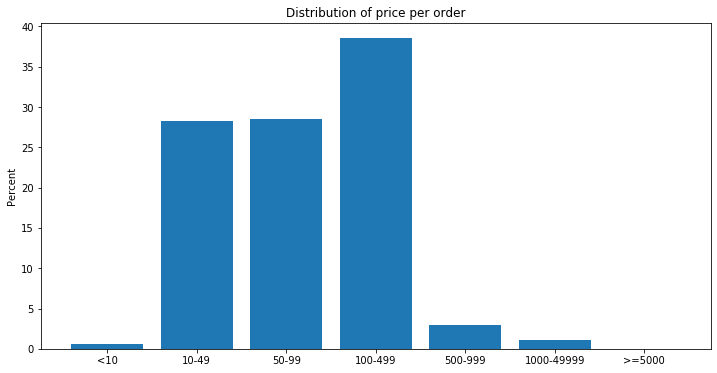

In [17]:
# What's the order value distribution per order?

price_order = df2.groupby('order_id').price.sum()

print(price_order.describe())

price_order_gr=price_order
price_order_gr.loc[price_order<10]=1
price_order_gr.loc[(10<=price_order) & (price_order<50)]=2
price_order_gr.loc[(50<=price_order) & (price_order<100)]=3
price_order_gr.loc[(100<=price_order) & (price_order<500)]=4
price_order_gr.loc[(500<=price_order) & (price_order<1000)]=5
price_order_gr.loc[(1000<=price_order) & (price_order<5000)]=6
price_order_gr.loc[5000<=price_order]=7

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.bar(['<10','10-49','50-99','100-499','500-999','1000-49999','>=5000'],price_order_gr.value_counts(normalize=True).sort_index()*100)
ax.set_title('Distribution of price per order')
ax.set_ylabel('Percent')
plt.xticks(rotation=0)
plt.show()

In [18]:
order_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [19]:
order_reviews.review_score.value_counts()

5    57420
4    19200
1    11858
3     8287
2     3235
Name: review_score, dtype: int64

In [20]:
sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


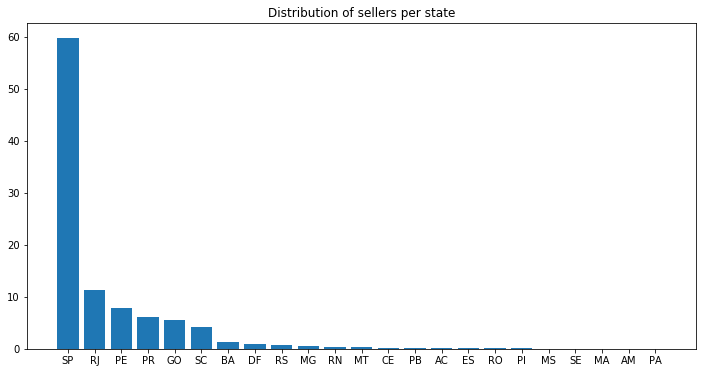

In [21]:
states = sellers.seller_state.unique()
cities = sellers.seller_city.unique()

distribution = sellers.seller_state.value_counts(normalize=True)*100

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.bar(states, distribution)
ax.set_title('Distribution of sellers per state')
plt.show()

In [22]:
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [23]:
products2 = pd.merge(products,product_category, on=['product_category_name'])
print(products2.product_category_name_english.value_counts().count())
products2.product_category_name_english.value_counts()

71


bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
fashion_childrens_clothes       5
home_comfort_2                  5
security_and_services           2
cds_dvds_musicals               1
Name: product_category_name_english, Length: 71, dtype: int64

In [24]:
product_category.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


> Observations:
* Most customers bought 1 item & 1 order 
* Most customers live in SP state
* 70% use credit card and 20% use boleto
* We have price per order informations
* Customer review score
* Product category

In [25]:
# Make data into customer-level

df3 = pd.DataFrame(df2['customer_unique_id'].unique(), columns=['customer_unique_id'])
df3['sum_price'] = df2.groupby('customer_unique_id').price.transform(sum)

orderid = df2.groupby('customer_unique_id').order_item_id.nunique().reset_index(name='n_order')
df3  = pd.merge(df3,orderid, on=['customer_unique_id'])

orderitem = df2.groupby('customer_unique_id').order_item_id.nunique().reset_index(name='n_order_item')
df3 = pd.merge(df3,orderitem, on=['customer_unique_id'])

payment = df2.groupby('customer_unique_id').payment_type.nunique().reset_index(name='n_payment')
df3 = pd.merge(df3,payment, on=['customer_unique_id'])

prodcat = df2.groupby('customer_unique_id').product_category_name_english.nunique().reset_index(name='n_cat')
df3 = pd.merge(df3,prodcat, on=['customer_unique_id'])

averev = df2.groupby('customer_unique_id').review_score.mean().reset_index(name='ave_reviews')
df3 = pd.merge(df3,averev, on=['customer_unique_id'])


df3.head()


,customer_unique_id,sum_price,n_order,n_order_item,n_payment,n_cat,ave_reviews
0,871766c5855e863f6eccc05f988b23cb,58.9,1,1,1,1,5.0
1,0fb8e3eab2d3e79d92bb3fffbb97f188,55.9,1,1,1,1,5.0
2,3419052c8c6b45daf79c1e426f9e9bcb,64.9,1,1,1,1,4.0
3,e7c828d22c0682c1565252deefbe334d,58.9,1,1,1,1,5.0
4,0bb98ba72dcc08e95f9d8cc434e9a2cc,58.9,1,1,1,1,5.0


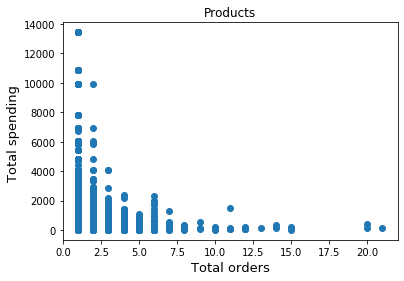

In [26]:
test = df3
plt.scatter(test['n_order'],test['sum_price'])
plt.title("Products")
plt.ylabel('Total spending ', fontsize=13)
plt.xlabel('Total orders', fontsize=13)
plt.show()

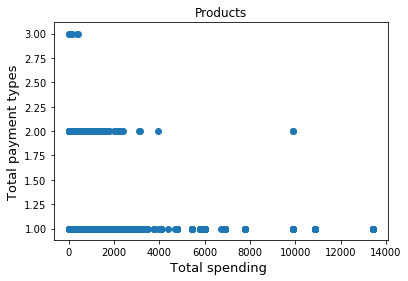

In [27]:
test = df3
plt.scatter(test['sum_price'],test['n_payment'])
plt.title("Products")
plt.xlabel('Total spending ', fontsize=13)
plt.ylabel('Total payment types', fontsize=13)
plt.show()

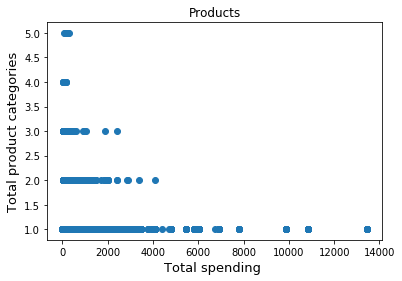

In [28]:
test = df3
plt.scatter(test['sum_price'],test['n_cat'])
plt.title("Products")
plt.xlabel('Total spending ', fontsize=13)
plt.ylabel('Total product categories', fontsize=13)
plt.show()

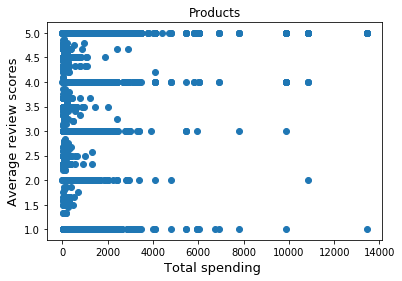

In [29]:
test = df3
plt.scatter(test['sum_price'],test['ave_reviews'])
plt.title("Products")
plt.xlabel('Total spending ', fontsize=13)
plt.ylabel('Average review scores', fontsize=13)
plt.show()

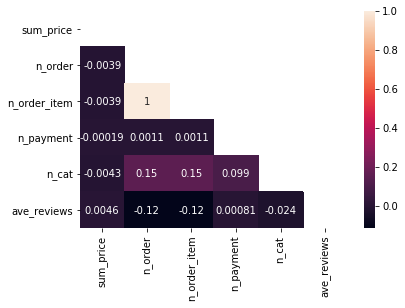

In [30]:
# correlation
matrix = np.triu(df3.corr())
sns.heatmap(df3.corr(),annot=True, mask= matrix)

In [31]:
# standardizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_scaled=scaler.fit_transform(test.drop('customer_unique_id', axis=1))

l=list(test.columns)
l.remove('customer_unique_id')
test_scaled=pd.DataFrame(test_scaled, columns=l)
test_scaled=pd.concat([test['customer_unique_id'],test_scaled],axis=1)
test_scaled.head()

,customer_unique_id,sum_price,n_order,n_order_item,n_payment,n_cat,ave_reviews
0,871766c5855e863f6eccc05f988b23cb,-0.322795,-0.26532,-0.26532,-0.163178,-0.149381,0.681312
1,0fb8e3eab2d3e79d92bb3fffbb97f188,-0.330425,-0.26532,-0.26532,-0.163178,-0.149381,0.681312
2,3419052c8c6b45daf79c1e426f9e9bcb,-0.307535,-0.26532,-0.26532,-0.163178,-0.149381,-0.066709
3,e7c828d22c0682c1565252deefbe334d,-0.322795,-0.26532,-0.26532,-0.163178,-0.149381,0.681312
4,0bb98ba72dcc08e95f9d8cc434e9a2cc,-0.322795,-0.26532,-0.26532,-0.163178,-0.149381,0.681312


In [32]:
test_scaled[['sum_price', 'n_order','n_payment','n_cat','ave_reviews']].describe()

,sum_price,n_order,n_payment,n_cat,ave_reviews
count,9.408700e+04,9.408700e+04,9.408700e+04,9.408700e+04,9.408700e+04
mean,-1.200650e-15,9.954448e-17,-9.465812e-16,2.086542e-14,-3.378636e-16
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-4.704368e-01,-2.653201e-01,-1.631776e-01,-1.493807e-01,-2.310772e+00
25%,-3.403440e-01,-2.653201e-01,-1.631776e-01,-1.493807e-01,-6.670899e-02
50%,-2.183136e-01,-2.653201e-01,-1.631776e-01,-1.493807e-01,6.813120e-01
75%,2.755211e-03,-2.653201e-01,-1.631776e-01,-1.493807e-01,6.813120e-01
max,3.371015e+01,3.660518e+01,1.228848e+01,2.367229e+01,6.813120e-01


In [33]:
from sklearn.cluster import KMeans

num_clusters=3

kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)

kmeans.fit(test_scaled[['sum_price', 'n_order','n_payment','n_cat','ave_reviews']])

test_scaled['cluster'] = kmeans.labels_

kmeans.inertia_




299470.6031264832

Text(0, 0.5, 'Inertia')

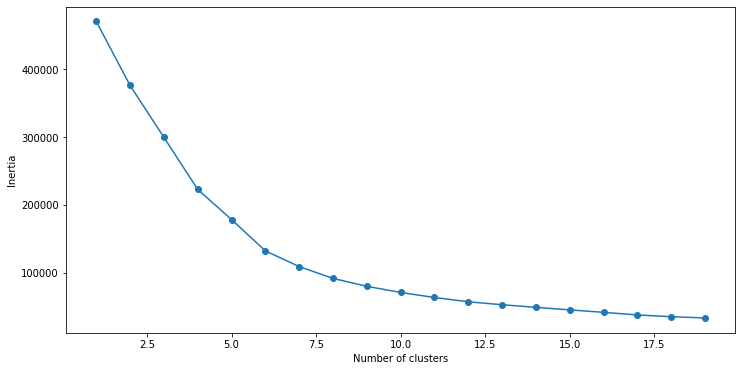

In [34]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++', random_state=0)
    kmeans.fit(test_scaled[['sum_price', 'n_order','n_payment','n_cat','ave_reviews']])
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

> Based on the elbow curve, let's choose the numbber of clusers as 5 and fit the model

In [35]:
num_clusters=5

kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)

kmeans.fit(test_scaled[['sum_price', 'n_order','n_payment','n_cat','ave_reviews']])

test_scaled['cluster'] = kmeans.labels_

kmeans.inertia_


178133.7259736054

In [36]:
test_clustered = pd.merge(test,test_scaled, on=['customer_unique_id'],suffixes=('','_scaled'))


In [37]:
test_clustered.head()

,customer_unique_id,sum_price,n_order,n_order_item,n_payment,n_cat,ave_reviews,sum_price_scaled,n_order_scaled,n_order_item_scaled,n_payment_scaled,n_cat_scaled,ave_reviews_scaled,cluster
0,871766c5855e863f6eccc05f988b23cb,58.9,1,1,1,1,5.0,-0.322795,-0.26532,-0.26532,-0.163178,-0.149381,0.681312,0
1,0fb8e3eab2d3e79d92bb3fffbb97f188,55.9,1,1,1,1,5.0,-0.330425,-0.26532,-0.26532,-0.163178,-0.149381,0.681312,0
2,3419052c8c6b45daf79c1e426f9e9bcb,64.9,1,1,1,1,4.0,-0.307535,-0.26532,-0.26532,-0.163178,-0.149381,-0.066709,0
3,e7c828d22c0682c1565252deefbe334d,58.9,1,1,1,1,5.0,-0.322795,-0.26532,-0.26532,-0.163178,-0.149381,0.681312,0
4,0bb98ba72dcc08e95f9d8cc434e9a2cc,58.9,1,1,1,1,5.0,-0.322795,-0.26532,-0.26532,-0.163178,-0.149381,0.681312,0


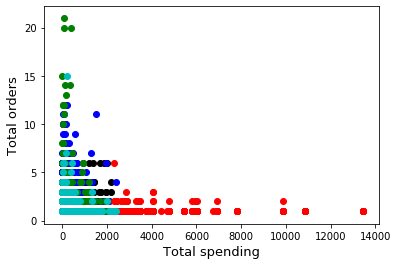

In [38]:
# Visualizing clusters
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['sum_price'], clustered_df['n_order'], c=colors[n-1])
        plt.xlabel('Total spending', fontsize=13)
        plt.ylabel('Total orders', fontsize=13)
    plt.show()


visualize_clusters(test_clustered, num_clusters)

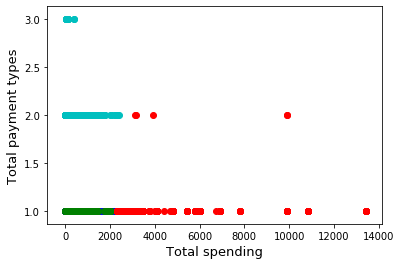

In [39]:
# Visualizing clusters
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['sum_price'], clustered_df['n_payment'], c=colors[n-1])
        plt.xlabel('Total spending', fontsize=13)
        plt.ylabel('Total payment types', fontsize=13)
    plt.show()


visualize_clusters(test_clustered, num_clusters)

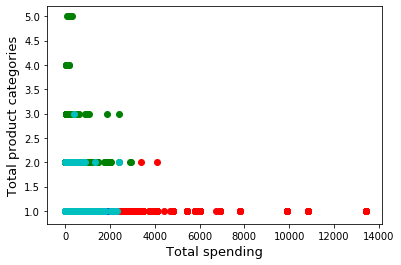

In [40]:
# Visualizing clusters
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['sum_price'], clustered_df['n_cat'], c=colors[n-1])
        plt.xlabel('Total spending', fontsize=13)
        plt.ylabel('Total product categories', fontsize=13)
    plt.show()


visualize_clusters(test_clustered, num_clusters)

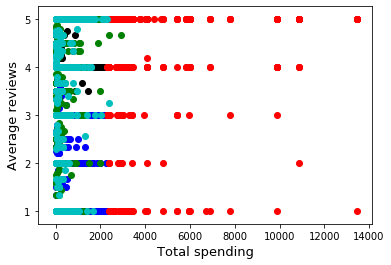

In [41]:
# Visualizing clusters
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['sum_price'], clustered_df['ave_reviews'], c=colors[n-1])
        plt.xlabel('Total spending', fontsize=13)
        plt.ylabel('Average reviews', fontsize=13)
    plt.show()


visualize_clusters(test_clustered, num_clusters)

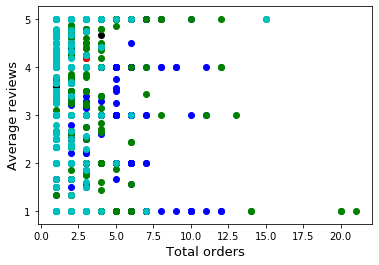

In [42]:
# Visualizing clusters
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['n_order'], clustered_df['ave_reviews'], c=colors[n-1])
        plt.xlabel('Total orders', fontsize=13)
        plt.ylabel('Average reviews', fontsize=13)
    plt.show()


visualize_clusters(test_clustered, num_clusters)

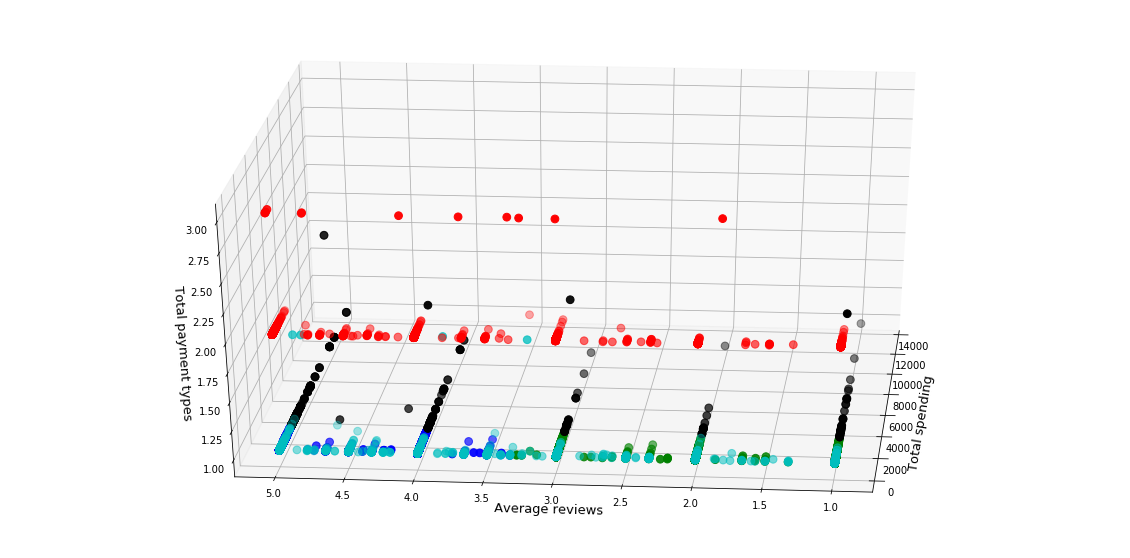

In [96]:
from mpl_toolkits.mplot3d import Axes3D

def visualize_clusters_3d(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection='3d')
    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        ax.scatter(clustered_df['sum_price'], clustered_df['ave_reviews'],  clustered_df['n_payment'], c=colors[n-1], s=60)
    ax.view_init(30, 185)
    plt.xlabel('Total spending', fontsize=13)
    plt.ylabel('Average reviews', fontsize=13)
    ax.set_zlabel('Total payment types', fontsize=13)
    plt.show()


visualize_clusters_3d(test_clustered, num_clusters)


In [77]:
df_sum1=test_clustered.groupby('cluster').cluster.count()
df_sum2=test_clustered.groupby('cluster').mean()
df_sum = pd.concat([df_sum1,df_sum2],axis=1)
df_sum = df_sum.rename(columns={'cluster':'cluster_size'})
df_sum['size_percent'] = round(df_sum['cluster_size']/len(df3)*100,2)
df_sum[['cluster_size','size_percent','sum_price', 'n_order', 'n_payment','n_cat','ave_reviews']].sort_values(by=['cluster_size'], ignore_index=True, ascending=False)

,cluster_size,size_percent,sum_price,n_order,n_payment,n_cat,ave_reviews
0,68887,73.22,167.935100,1.095228,1.000000,1.000000,4.748191
1,20416,21.70,167.202505,1.248384,1.000000,1.000000,1.889973
2,2433,2.59,174.389441,1.139334,2.004932,1.109741,4.093001
3,1953,2.08,174.375335,1.786482,1.008193,2.070661,3.810538
4,398,0.42,4361.658593,1.087940,1.012563,1.005025,4.181407


We have the following segments:
1. Happy shoppers - majority group (cluster 0)
2. Unhappy shoppers (cluster 1) 
3. Multi payment users (cluster 2)
5. Multi category shoppers (cluster 3)
4. High spenders (cluster 4)


We can see that cluster 2 have highest spending which tend to have highest number of orders and number of ordered items. Let's redo the analysis but dropping n_order and n_order_item

Text(0, 0.5, 'Inertia')

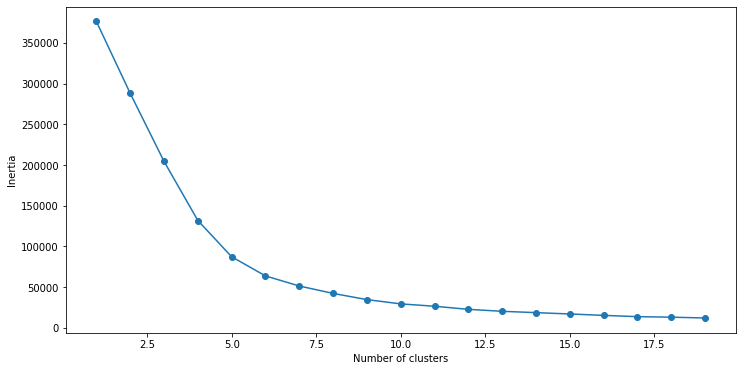

In [78]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++', random_state=0)
    kmeans.fit(test_scaled[['sum_price', 'n_payment','n_cat','ave_reviews']])
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

> Let's still pick 5 clusters

In [85]:
num_clusters=5

kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)

kmeans.fit(test_scaled[['sum_price','n_payment','n_cat','ave_reviews']])

test_scaled['cluster'] = kmeans.labels_

kmeans.inertia_

test_clustered = pd.merge(test,test_scaled, on=['customer_unique_id'],suffixes=('','_scaled'))


In [86]:
df_sum1=test_clustered.groupby('cluster').cluster.count()
df_sum2=test_clustered.groupby('cluster').mean()
df_sum = pd.concat([df_sum1,df_sum2],axis=1)
df_sum = df_sum.rename(columns={'cluster':'cluster_size'})
df_sum['size_percent'] = round(df_sum['cluster_size']/len(df3)*100,2)
df_sum[['cluster_size','size_percent','sum_price', 'n_order', 'n_payment','n_cat','ave_reviews']].sort_values(by=['cluster_size'], ignore_index=True, ascending=False)

,cluster_size,size_percent,sum_price,n_order,n_payment,n_cat,ave_reviews
0,69039,73.38,167.903660,1.104173,1.000000,1.000000,4.746628
1,20273,21.55,167.183906,1.225867,1.000000,1.000000,1.874259
2,2433,2.59,174.389441,1.139334,2.004932,1.109741,4.093001
3,1942,2.06,173.107209,1.716787,1.008239,2.076210,3.816330
4,400,0.43,4353.131000,1.097500,1.012500,1.007500,4.174667
